In [2]:
import numpy as np
import pandas as pd
import random

# Import library to use Decision Trees
from sklearn.tree import DecisionTreeClassifier
# Import library to split data into training and test sets
from sklearn.model_selection import train_test_split
# Import library to measure performance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import statistics as stat
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import LabelEncoder


In [5]:
#read csv
df = pd.read_csv('../resources/datasets/ppp_updated_transformed_FINAL.csv')
df.head()

isFraud  log_InitialApprovalAmount_standardised  \
0        1                                0.985015   
1        1                                0.928765   
2        1                                0.421815   
3        1                                0.019799   
4        1                               -0.125152   

   log_CurrentApprovalAmount_standardised  log_TOTAL_PROCEED_standardised  \
0                                0.995606                        0.995611   
1                                0.938581                        0.938587   
2                                0.424650                        0.424659   
3                                0.017099                        0.017109   
4                               -0.129848                       -0.129838   

   log_PROCEED_Per_Job_standardised  log_JobsReported_standardised  \
0                          0.255028                       0.715986   
1                         -0.036805                       0.904422   
2                          1.176095                      -0.533077   
3                          0.494347                      -0.331917   
4                          0.518176                      -0.479404   

   payroll_over_other  Term_cat_between_24_60  Term_cat_is_24  Term_cat_is_60  \
0            0.335918                   False            True           False   
1            0.335918                   False            True           False   
2            0.335918                   False            True           False   
3            0.335918                   False            True           False   
4            0.335918                   False            True           False   

   ...  BorrowerState_VI  BorrowerState_VT  BorrowerState_WA  \
0  ...             False             False             False   
1  ...             False             False             False   
2  ...             False             False             False   
3  ...             False             False             False   
4  ...             False             False             False   

   BorrowerState_WI  BorrowerState_WV  BorrowerState_WY  IsFranchise_0  \
0             False             False             False           True   
1             False             False             False           True   
2             False             False             False           True   
3             False             False             False           True   
4             False             False             False           True   

   IsFranchise_1  isAfterBiden_0  isAfterBiden_1  
0          False            True           False  
1          False            True           False  
2          False            True           False  
3          False            True           False  
4          False            True           False  

[5 rows x 156 columns]

In [6]:
#Performance Report
def generateClassificationReport(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))    
    print('accuracy is ',accuracy_score(y_test,y_pred))

In [7]:
# Split the data into training, validation and test sets
X = df.drop(columns=['isFraud'])
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y,  random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test,  random_state = 1)

In [8]:
# Build a Decision Tree model,
best_class_weight=0.0014891067438111466
dt1_hyper = DecisionTreeClassifier( criterion = 'entropy', max_depth= 3, min_samples_split= 2,class_weight= {0: best_class_weight, 1: 1.0 - best_class_weight},random_state = 1)
# Give training set for the DT1_hyper to learn from
dt1_hyper.fit(X_train, y_train)

# Give the test set to the DT1_hyper, which returns its predicted answers
y_pred = dt1_hyper.predict(X_test)
dt1_hyper_result=[]
generateClassificationReport(y_test,y_pred)
dt1_hyper_result.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    192274
           1       0.01      0.98      0.02       105

    accuracy                           0.96    192379
   macro avg       0.51      0.97      0.50    192379
weighted avg       1.00      0.96      0.98    192379

[[183877   8397]
 [     2    103]]
accuracy is  0.9563413886131023


 99%|===================| 1137137/1154270 [00:49<00:00]        

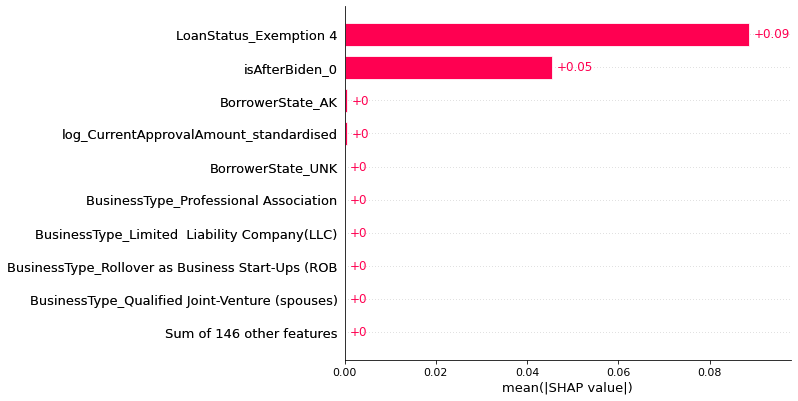

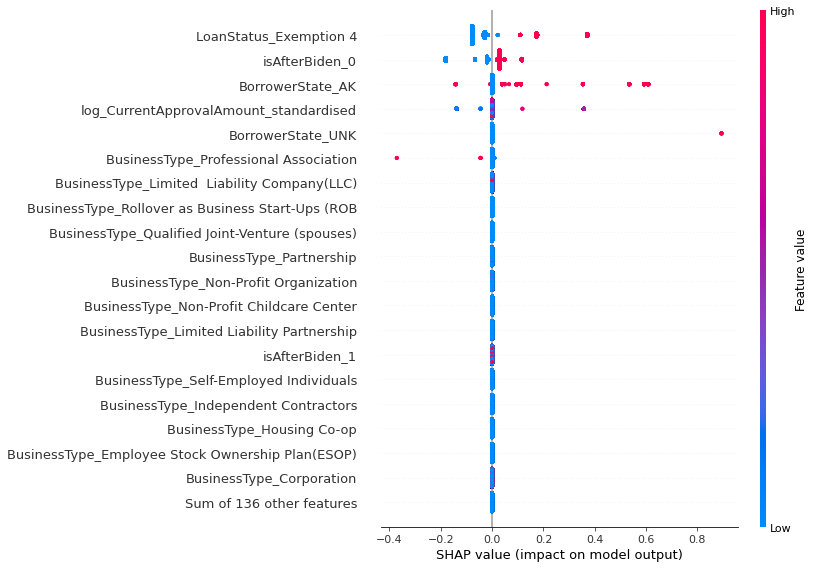

In [9]:
import shap
shap.initjs()

# Assuming 'model' is your trained decision tree model and 'X_train' is your training data
x_sample = X_train.astype('float')
explainer_dt = shap.Explainer(dt1_hyper, x_sample)
shap_values_dt = explainer_dt(x_sample)

shap.plots.bar(shap_values_dt[:, :, 1])
shap.plots.beeswarm(shap_values_dt[:, :, 1], max_display=20)

In [12]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE()

#Apply Over Sampling
print('Before Oversampling')
print(sorted(Counter(y_train).items()))
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)
print('After Oversampling')
print(sorted(Counter(y_train_smote).items()))

#Fitting Model
dt_smote = DecisionTreeClassifier( criterion = 'gini', max_depth= 4, min_samples_split= 16 ,random_state = 1)
# Give training set for the DT_smote to learn from
dt_smote.fit(X_train_smote, y_train_smote)
smote_dt_result=[]
target_pred = dt_smote.predict(X_val)
generateClassificationReport(y_val,target_pred)
smote_dt_result.append(accuracy_score(y_val,target_pred))


Before Oversampling
[(0, 576821), (1, 314)]
After Oversampling
[(0, 576821), (1, 576821)]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    192274
           1       0.02      0.95      0.03       104

    accuracy                           0.97    192378
   macro avg       0.51      0.96      0.51    192378
weighted avg       1.00      0.97      0.99    192378

[[186818   5456]
 [     5     99]]
accuracy is  0.9716131782220421


100%|===================| 2305903/2307284 [02:42<00:00]        

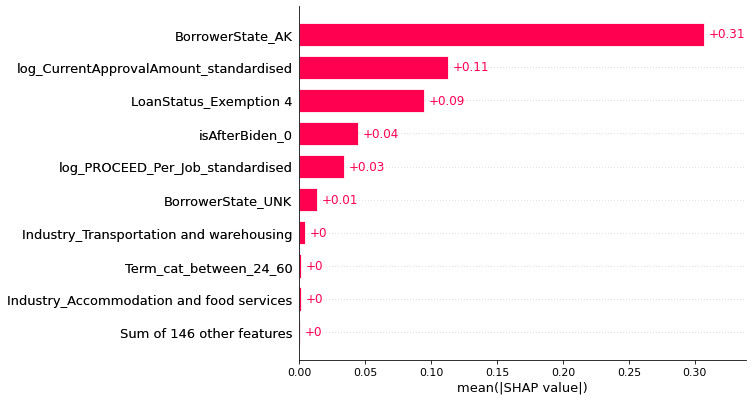

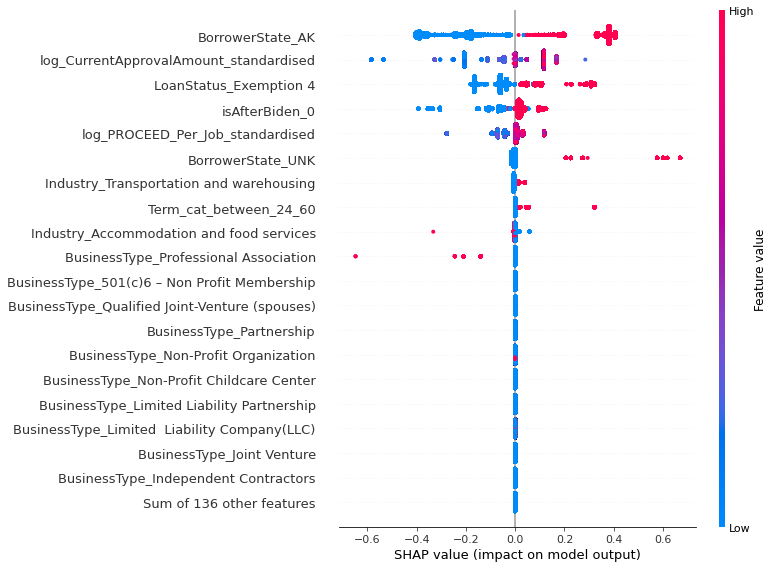

In [14]:
import shap
shap.initjs()

# Assuming 'model' is your trained decision tree model and 'X_train' is your training data
x_sample = X_train_smote.astype('float')
explainer_dt = shap.Explainer(dt_smote, x_sample)
shap_values_dt = explainer_dt(x_sample)

shap.plots.bar(shap_values_dt[:, :, 1])
shap.plots.beeswarm(shap_values_dt[:, :, 1], max_display=20)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler


# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to the training data
X_resampled1, y_resampled1 = rus.fit_resample(X_train, y_train)
rus_dt = DecisionTreeClassifier(criterion = 'gini', max_depth= 4, min_samples_split= 16 ,random_state = 1)
rus_dt_result=[]
rus_dt.fit(X_resampled1, y_resampled1)
target_pred = rus_dt.predict(X_val)
generateClassificationReport(y_val,target_pred)
rus_dt_result.append(accuracy_score(y_val,target_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98    192274
           1       0.01      0.93      0.03       104

    accuracy                           0.96    192378
   macro avg       0.51      0.95      0.50    192378
weighted avg       1.00      0.96      0.98    192378

[[185158   7116]
 [     7     97]]
accuracy is  0.962973936728732


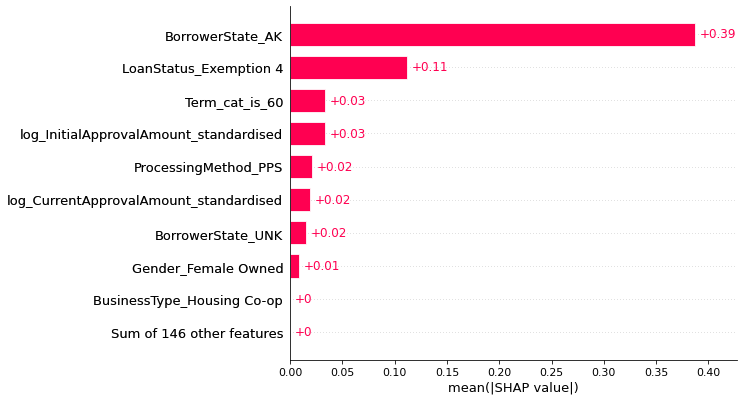

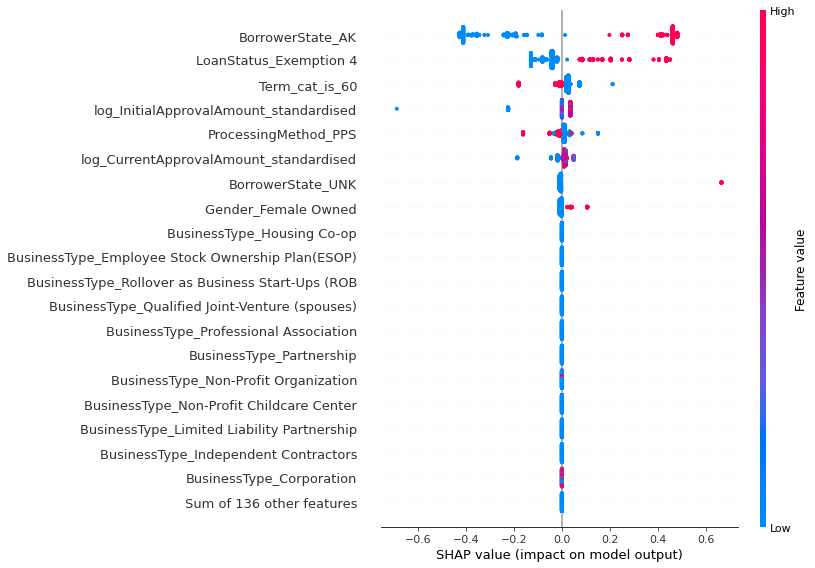

In [16]:
import shap
shap.initjs()

# Assuming 'model' is your trained decision tree model and 'X_train' is your training data
x_sample = X_resampled1.astype('float')
explainer_dt = shap.Explainer(rus_dt, x_sample)
shap_values_dt = explainer_dt(x_sample)

shap.plots.bar(shap_values_dt[:, :, 1])
shap.plots.beeswarm(shap_values_dt[:, :, 1], max_display=20)